In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Outlier Removal using Percentile

Percentile is a statistical measure that gives the percentage of data values that fall below a given data value

## How to check for OUTLIER

Decide percentile on both sides which you consider as outlier

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

<ipython-input-6-26046355a377>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],color = 'blue')


<Axes: xlabel='Height', ylabel='Density'>

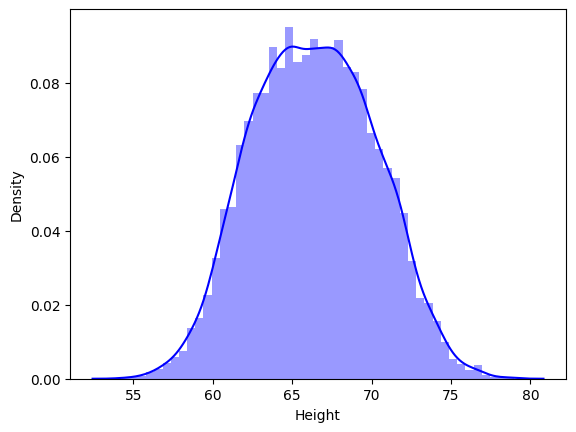

In [6]:
sns.distplot(df['Height'],color = 'blue')

<Axes: ylabel='Height'>

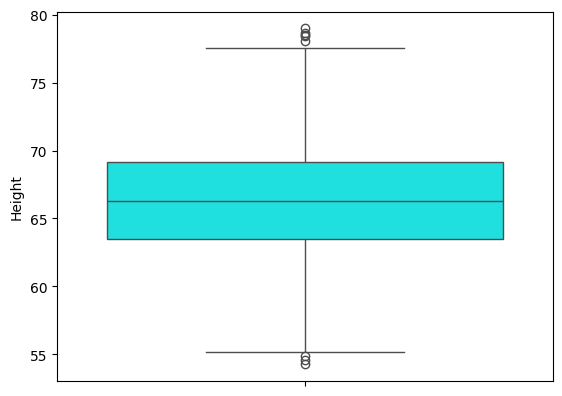

In [7]:
sns.boxplot(df['Height'],color = 'cyan')

In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
min_limit = df['Height'].quantile(0.01)
max_limit = df['Height'].quantile(0.99)

In [10]:
min_limit

58.13441158671655

In [11]:
max_limit

74.7857900583366

In [12]:
dfl = df[(df['Height'] > max_limit) | (df['Height'] < min_limit)]

In [13]:
dfl.describe()

,Height,Weight
count,200.000000,200.000000
mean,66.524055,163.442893
std,9.462925,68.404598
min,54.263133,64.700127
25%,57.302304,96.247315
50%,66.459656,166.323577
75%,75.691366,229.248940
max,78.998742,269.989699


In [14]:
dfl.shape

(200, 3)

# Trimming

In [15]:
df_new = df[(df['Height'] < max_limit) & (df['Height'] > min_limit)]

In [16]:
df_new.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


<Axes: ylabel='Height'>

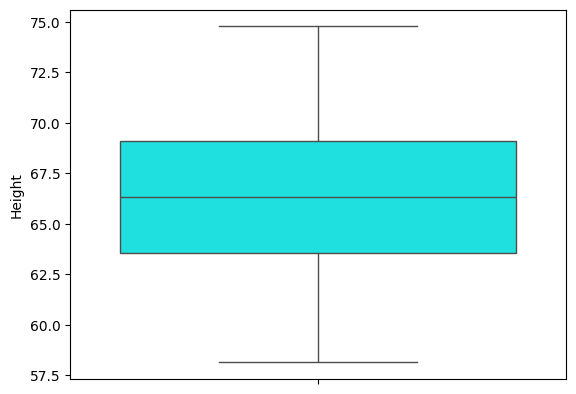

In [17]:
sns.boxplot(df_new['Height'],color = 'cyan')

# Capping

In [18]:
df['Height'] = np.where(df['Height'] > max_limit,max_limit,
                        np.where(df['Height'] < min_limit,min_limit,df['Height']))

In [19]:
df.shape

(10000, 3)

<Axes: ylabel='Height'>

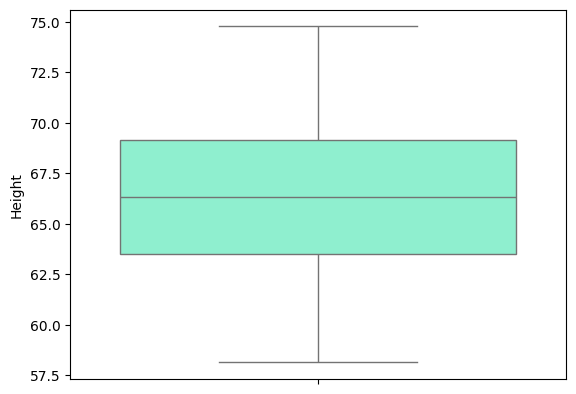

In [20]:
sns.boxplot(df['Height'],color = 'aquamarine')